In [14]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import plot_functions as visuals
import matplotlib.pyplot as plt
csv_data = visuals.load_data("data.csv")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# How has the number of deaths in the workplace changed in the past 10 years across the US?

“Safety Regulations are Written in Blood” - this is a common saying amongst machine shop operators, OSHA inspectors, and construction foremen. Because regulations on workplace safety except for the most extreme of circumstances are left up to state bureaucracy, the number of workplace fatalities that occur in each state may tell us valuable information as to whether any state’s approach to legislating workplace safety is effective. 

We looked at the number of workplace fatalities over the last 10 years in each of the 50 states because we believed that the different approaches to regulation from different legislatures may have caused a change in the workplace deaths in those states over time. This data can serve as a basis for arguments to tighten (or loosen) workplace regulations.

Looking at this data, we can identify states which have had increases in workplace fatalities and which have had decreases. Pointing out which states have had success in curbing workplace death can be useful to determine legislative models that work to keep people safe. 


# Processing Data From BLS

We found this data thorough the Bureau of Labor Services (BLS) public data API. To access the data, we executed an API call, with our private API key, which returned a dictionary of scattered data. To get our API key, we signed up on the BLS website [https://www.bls.gov/developers/home.htm].

Each state data could be accessed using the state ID, given by the BLS. We used the state IDs and plugged them into a basic series ID to create an ID that we could use to parse through the data. Information on series IDs can be found on the series id formats page on the BLS website [https://www.bls.gov/help/hlpforma.htm#SPEND].

Data for each state was further stored in a list of dictionaries with a separate dictionary for each year of data. To format this data into a single dataframe that we could easily translate into a csv file, we created a dictionary with years as keys. Each year mapped to a dictionary where state names mapped to fatality numbers. From this dictionary, we were able to use Pandas to convert it into a DataFrame with years as columns and states as rows. We then inserted the data from the DataFrame into a csv file which we use to process the data further.

In presenting our results, we use the fatality numbers from each state and year to show patterns. We made sure that our API call did not give us any additional information that we would not use in our data visualizations and analysis.

# Visualizing the Data

We created one visualization that shows all of our data in one place, and multiple visualizations that show subsets of this data. 50 lines on one graph can be hard to follow, so we will not be doing the bulk of our analysis in the visualizations of our state sub-sets.

## Fatalities per year in all US states

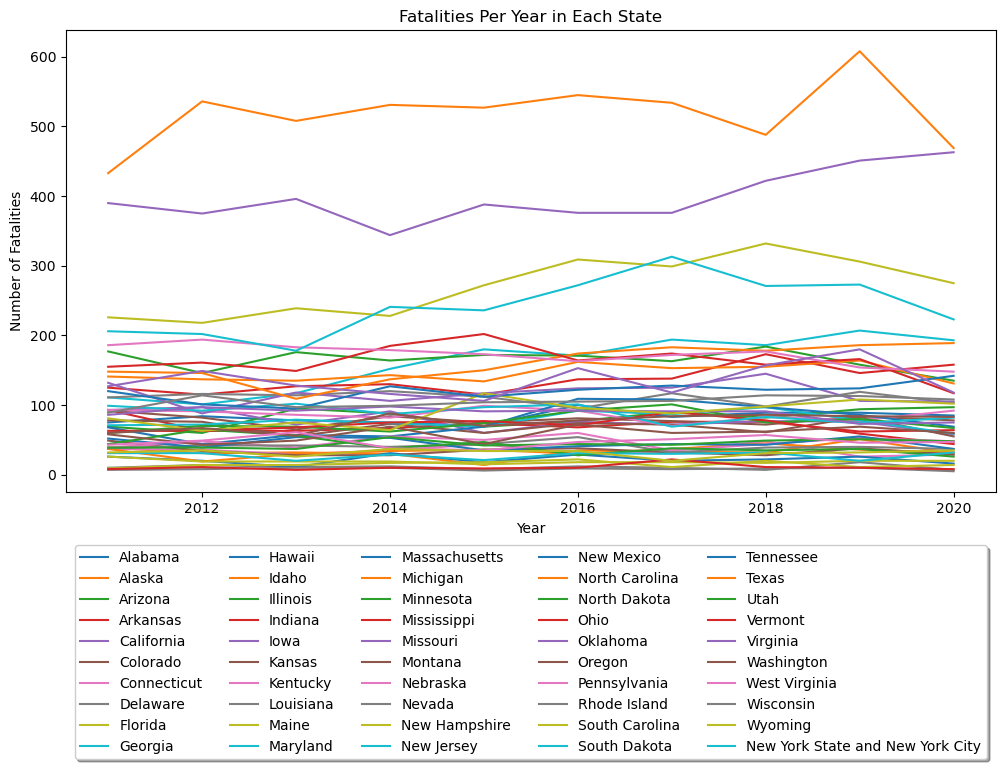

In [15]:
plt.figure(figsize=(12,6))
visuals.plot_all_data(csv_data)

This visualization shows an important distinction between states that must be made before drawing conclusions from this data: states with high populations (California, Florida, and Texas) will have much higher rates of death than states with a smaller population. In addition, there are states with near-zero rates of workplace fatalities, and for these states it is reasonable to assume that the conclusions you will be able to draw from them will be less statistically sound than states for which you have a larger sample size of average death-rate. 

## National Average Fatalities Per State, Compared to Fatalities in Massachusetts

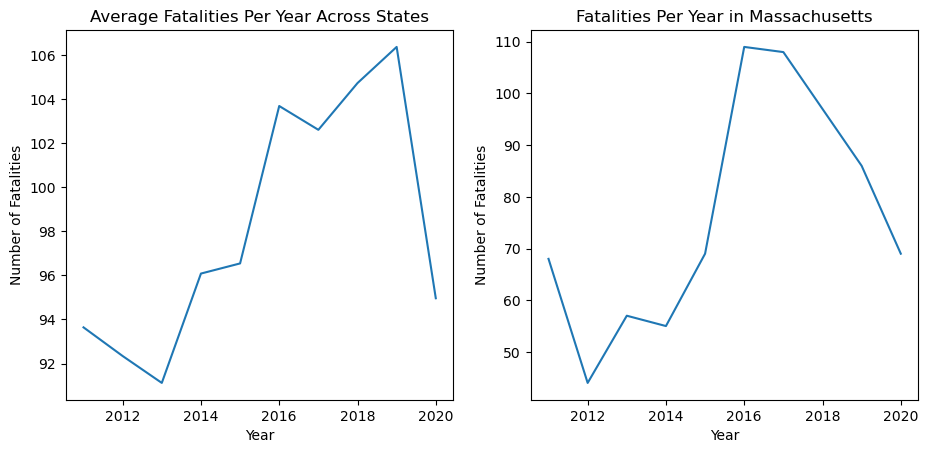

In [6]:
plt.figure().set_figwidth(11)

visuals.plot_mean_data(csv_data, 1, 2, 1)
visuals.plot_state(csv_data, "Massachusetts", 1, 2, 2)

By reducing the data of the 50 states into one collective average, we can see a general positive trend of 10% in workplace fatalities between 2011 and 2019, with a sharp decrease in 2020. This decrease directly correlates with the move to socially distanced work in 2020, however this does not explain why workplace fatalities were steadily increasing for the nation during the preceding 8 years. 

This upward trend is indicative of an underlying story of workplace regulation in the United States: the Trump presidency (2016-2020) was accompanied with massive layoffs and deregulation in workplace, environmental, and other sectors [https://www.epi.org/publication/deregulation-year-in-review/] . Although it is nearly impossible to draw a direct correlation with so many factors involved, this does coincide with the peaks in workplace fatalities nationally. Beyond the Trump presidency, workplace regulation and the funding to enforce it has been in flux for decades on both a national and statewide level. 

We can see through the visualization of the Massachusetts Fatalities data that although individual states of different sizes may not have followed the exact numbers of average fatalities nationwide, the general trends can be see in in how a state’s fatalities trend up and down relative to itself. For instance, the 2020 covid-related drop is present in this data as is the general positive trend before the year 2016. The most notable differences between the national average and Massachusett’s individual timeline is the time period between 2016 and 2018, where the national average trended upwards while Massachusetts maintained its fatality rate.

## States which Increased or Decreased their fatalities

By separating out states which changed their fatality rates significantly, we can examine whether there are any factors that connect these states (i.e. geography, economic factors, or even politics). We chose to use a scale factor rather than a number of deaths to gauge an increase or decrease because this puts large states on a more level plane of comparison with smaller states. 

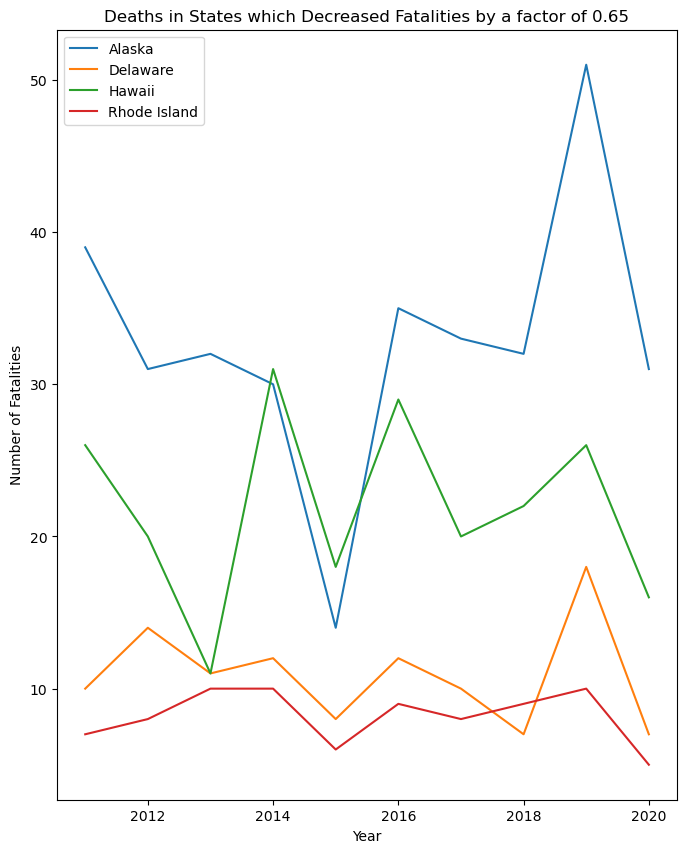

In [16]:
visuals.plot_beyond_change_threshold_data(csv_data, .65, 1, 1, 1)

Although using the measure of proportional change to separate out states for comparison, we run into the problem which we mentioned in our first plot: small states with under 20 fatalities per year are much more likely to have a high percent change without appreciable variance in their data. For instance, Rhode Island has a change of under 5 deaths, which is hardly statistically significant. 

The states which have made large decreases in death rate, Alaska and Hawaii, are notable for their large tourism and fishing industries relative to their small population. It is notable that both of these are states are outside of the norm of economic production and activity that most east-coast, west-coast, or middle-american states are. Because they are far economically and geographically from the mainland, their downward trend in death rate may not have as much connection with other state’s death rates which are more similar to eachother. 

Perhaps the most interesting and least explainable point of this graph is that there is a sharp drop in all of the graphs during 2015, followed by a return to the norm in 2016. 

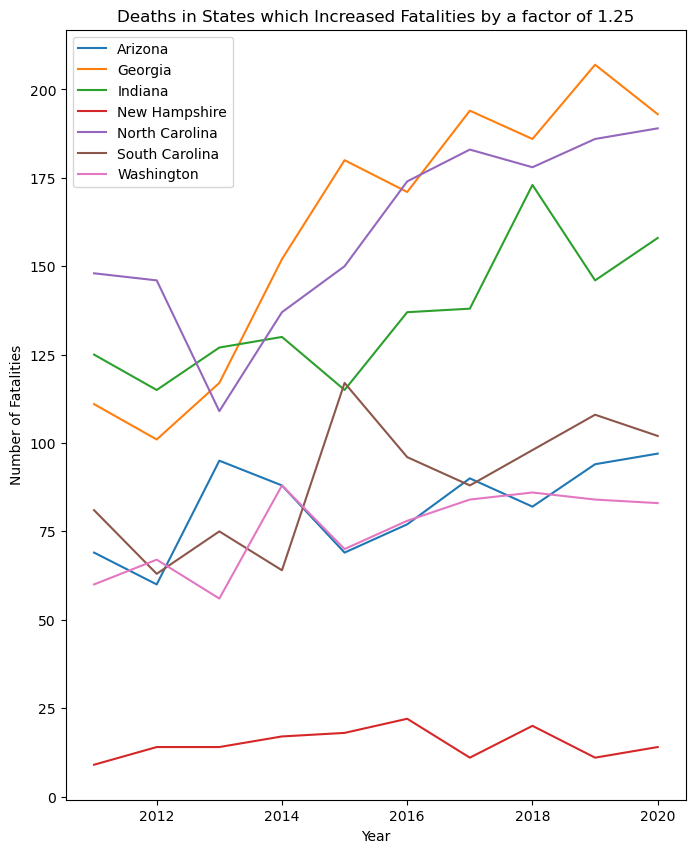

In [17]:
visuals.plot_beyond_change_threshold_data(csv_data, 1.25, 1, 1, 1)

States in which the fatalities increased by a factor of 25% included Arizona, Georgia, Indiana, New Hampshire, North Carolina, South Carolina, and Washington state. 

It is interesting that of the smallest states, only New Hampshire increased its fatalities substantially. One would assume that through variance in the data (i.e. a particularly bad year) more of the small states would have large proportional increases in death rate, but the variance over time appears to be stronger in larger states. 

Politically, Washington State is the only state of those that increased their fatalities rate by 25% which regularly votes democratic, and New Hampshire is the only swing state: Arizona, Georgia, Indiana, as well as North and South Carolina are Republican strongholds. The fact that a majority of the states which increased their death rates substantially have republican state legislatures cannot be overlooked in analyzing this subsection of the data, especially as the “eliminating needless workplace regulations” is a frequent campaigning promise.

This visualizations suggests that there should be a more in-depth examination of the effect that workplace regulation or deregulation on a statewide level impacts worker health.

# Conclusion
The story of workplace-fatalities across the nation is a look into how much we value human life and how much we value profit as a society. State-to-state distinctions in the shape of this data shows that legislation matters in the curbing of this heartbreaking statistic, and that deregulation may come at a cost to human life. In addition, the nationwide statistics and their mirroring on individual-state levels shows that sometimes these shifts in trends happen on a national rather than statewide scale, due to factors outside of an individual state’s control. 

The outsized impact of nationwide events like the Pandemic on the number of workplace fatalities should make us more vigilant, and not less, on the way that our policies affect workplace safety. It is our duty as a society to make earning a living something that is achievable, safe, and well-regulated for the well-being of the average american. 

If we had more time, we would have loved to do more data analysis on states that did not particularly fit our mental-model of workplace deaths: for instance, examining the sub-state-level statistics on Hawaii or Alaskan workplace fatalities, to see if tourism or other quirks of those state’s economies contributed to their non-typical data shape. 

In addition, doing nationwide comparisons over different industries could show valuable data about the dangers of different occupations, and may reveal interesting trends if the death rates of those occupations vary widely between states. 

While working on the project, we learned a lot about working with API's and specifically how to restructure data into more usable formats for our own needs. We also learned about some interesting trends comparing the data to politics.

The most challenging parts of this project included parsing through the data from the API call to format it into a dataframe. It was hard frustrating to first figure out how to pull the data from the API because the BLS website which we used was somewhat confusing.